In [4]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
Brand = []
load = []
Ratings = []
no_of_ratings = []
no_of_reviews = []
price = []
automation = []
load_type = []
Max_speed = []
Star_rating = []


for i in range(1,41):
    
    url = f"https://www.flipkart.com/search?q=washing+machine&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"

    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    
    page = requests.get(url,headers =request_header)

    soup = BeautifulSoup(page.text)


    for i in soup.find_all('div',class_='tUxRFH'):
        title_ = i.find("div",class_="col col-7-12")
    
        text = title_.text.strip()
        #print(text)
    
        #regex = re.findall('^[\w\d]+',text)
    
        #if regex:
            #Brand.append(regex[0])
        #else:
            #Brand.append(np.nan)
        
        regex = re.findall('\d+',text)
    
        if regex:
            load.append(regex[0])
        else:
            load.append(np.nan)
        
        regex = re.findall('Semi|semi|Fully|fully|Automatic|automatic',text)
    
        if regex:
            automation.append(regex[0])
        else:
            automation.append(np.nan)
    
        regex = re.findall('Top|Front|top|front|load|Load',text)
    
        if regex:
            load_type.append(regex[0])
        else:
            load_type.append(np.nan)
        
        price_ = i.find("div",class_="Nx9bqj _4b5DiR")
        if price_:
            text2 = price_.text.strip()
            #print(text2)
        
            regex = re.findall('(.+)',text2)
        
            if regex:
                price.append(regex[0])
            else:
                price.append(np.nan)
        else:
            price.append(np.nan)
        a_= i.find("div",class_='_6NESgJ')
        
        text3 = a_.text.strip()
        #print(text3)
    
        regex = re.findall('\d+',text3)
    
        if regex:
            Max_speed.append(regex[0])
        else:
            Max_speed.append(np.nan)
            
        regex = re.findall('(\d)\sStar',text3)
    
        if regex:
            Star_rating.append(regex[0])
        else:
            Star_rating.append(np.nan)
        
        Brand_ = i.find('div',class_='KzDlHZ')
        text4 = Brand_.text.strip()
        #print(text4)
        
        regex = re.findall('^[\w\d]+',text4)
        
        if regex:
            Brand.append(regex[0])
        else:
            Brand.append(np.nan)
            
            
        Rating_ = i.find('div',class_='XQDdHH')
        if Rating_:
            text5 = Rating_.text
            regex = re.findall('.+',text5)

            if regex:
                Ratings.append(regex[0])
            else:
                Ratings.append(np.nan)
        else:
            Ratings.append(np.nan)
            
        Ratings_ = i.find('span',class_='Wphh3N')
        if Ratings_:
            text6 = Ratings_.text
            #print(text6)
            regex = re.findall('(\d.+)\sRatings',text6)

            if regex:
                no_of_ratings.append(regex[0])
            else:
                no_of_ratings.append(np.nan)
        else:
            no_of_ratings.append(np.nan)
            
        """Reviews_ = i.find('span',class_='Wphh3N')
        if Reviews_:
            text7 = Ratings_.text           
            regex = re.findall('&\s(\d.+)\sReviews',text7)

            if regex:
                no_of_reviews.append(regex[0])
            else:
                no_of_reviews.append(np.nan)
        else:
            no_of_reviews.append(np.nan)"""

In [5]:
d={"Brand":Brand,
  "Load":load,
  "Rating":Ratings,
  "Users":no_of_ratings,
  #"No_of_Reviews":no_of_reviews,
  "Price":price,
  "Automated_Type":automation,
  "Load_type":load_type,
  "Speed":Max_speed,
  "Star_ratings":Star_rating}

In [6]:
import pandas as pd
df=pd.DataFrame(d)

In [7]:
df

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4,"8,834","₹7,690",Semi,Top,1600,5
1,realme,7,4.1,"19,495","₹11,790",Fully,Top,700,5
2,realme,7,4.2,"51,785","₹7,890",Semi,Top,1400,5
3,LG,7,4.4,"28,184","₹11,490",Semi,Top,1350,5
4,Whirlpool,7,4.4,"13,340","₹9,990",Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
955,LG,7,4.4,809,"₹24,990",Fully,Top,700,5
956,Thomson,10,4,"1,078","₹14,490",Fully,Top,900,5
957,BOSCH,7,4.4,"8,786","₹30,990",Fully,Front,1000,5
958,Lloyd,7,4.3,28,"₹11,369",Semi,Top,600,NaN


### SAVE THE DATA INTO LOCAL DIRECTORY

In [8]:
df.to_csv("df.csv")

### DATA CLEANING

In [9]:
df[df.duplicated()]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
26,Thomson,7,4,"8,834","₹7,690",Semi,Top,1600,5
27,realme,7,4.2,"51,785","₹7,890",Semi,Top,1400,5
30,Thomson,7,4,"8,834","₹7,590",Semi,Top,1400,5
31,BOSCH,8,4.4,"8,795","₹35,900",Fully,Front,1400,5
36,realme,8,4.2,"51,785","₹9,890",Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
947,BOSCH,8,4.4,"8,786","₹35,900",Fully,Front,1400,5
950,realme,8,4.2,"51,609","₹9,890",Semi,Top,1400,5
951,Thomson,10,4,"8,785","₹9,799",Semi,Top,1600,NaN
956,Thomson,10,4,"1,078","₹14,490",Fully,Top,900,5


In [10]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           571 non-null    object
 1   Load            571 non-null    object
 2   Rating          491 non-null    object
 3   Users           440 non-null    object
 4   Price           570 non-null    object
 5   Automated_Type  533 non-null    object
 6   Load_type       503 non-null    object
 7   Speed           571 non-null    object
 8   Star_ratings    463 non-null    object
dtypes: object(9)
memory usage: 44.6+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           960 non-null    object
 1   Load            960 non-null    object
 2   Rating          867 non-null    object
 3   Users           812 non-null    object
 4   Price           959 non-null    object
 5   Automated_Type  909 non-null    object
 6   Load_type       874 non-null    object
 7   Speed           960 non-null    object
 8   Star_ratings    802 non-null    object
dtypes: object(9)
memory usage: 67.6+ KB


In [12]:
df=df.drop_duplicates()

### Treatment of Missing Values

In [45]:
df.isnull().sum()

Brand             0
Load              0
Rating            0
Users             0
Price             1
Automated_Type    0
Load_type         0
Speed             0
Star_ratings      0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           568 non-null    object
 1   Load            568 non-null    object
 2   Rating          568 non-null    object
 3   Users           568 non-null    object
 4   Price           567 non-null    object
 5   Automated_Type  568 non-null    object
 6   Load_type       568 non-null    object
 7   Speed           568 non-null    object
 8   Star_ratings    568 non-null    object
dtypes: object(9)
memory usage: 60.5+ KB


In [47]:
df[df["Price"].isna()]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
378,Godrej,8,4.4,570,NaN,Semi,Top,1400,0


In [16]:
## This washing machine is out of stock in the sight. So we are dropping the product

In [48]:
df=df.drop(378)

In [49]:
df[df["Price"].isna()]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings


In [50]:
df['Rating'].isnull().sum()

0

In [51]:
df[df["Rating"].isna()]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings


In [52]:
df.groupby(["Brand","Load"])[["Rating"]].median()

Rating
Brand  Load       
Acer   7       4.1
       8       4.1
BLACK  6       3.8
BOSCH  10      4.4
       6       4.3
...            ...
White  9       3.8
realme 11      4.0
       12      4.2
       7       4.2
       8       4.2

[118 rows x 1 columns]

In [53]:
df['Users'].isnull().sum()

0

In [54]:
df['Price'].isnull().sum()

0

In [55]:
df['Automated_Type'].isnull().sum()

0

In [56]:
df['Load_type'].isnull().sum()

0

In [57]:
df['Star_ratings'].isnull().sum()

0

In [58]:
df['Star_ratings'].fillna("0",inplace=True)
df['Users'].fillna("0",inplace=True)

In [59]:
df['Star_ratings'].isnull().sum()

0

In [60]:
df['Users'].isnull().sum()

0

In [61]:
df['Rating'].isnull().sum()

0

In [62]:
df['Rating'].fillna("0",inplace=True)

In [63]:
df['Automated_Type'].mode()

0    Fully
Name: Automated_Type, dtype: object

In [64]:
df['Automated_Type'].fillna(df['Automated_Type'].mode()[0],inplace=True)

In [65]:
df['Automated_Type'].isnull().sum()

0

In [66]:
df['Load_type'].mode()

0    Top
Name: Load_type, dtype: object

In [67]:
df['Load_type'].fillna(df['Load_type'].mode()[0],inplace=True)

In [68]:
df['Load_type'].isnull().sum()

0

In [69]:
df.isnull().sum()

Brand             0
Load              0
Rating            0
Users             0
Price             0
Automated_Type    0
Load_type         0
Speed             0
Star_ratings      0
dtype: int64

In [70]:
df['Users'][0].replace(",","")

'8834'

In [71]:
df['Users'] = [i.replace(",","") for i in df['Users']]

In [72]:
df['Price'] = [i.replace("₹","") for i in df['Price']]

In [73]:
df['Price'] = [i.replace(",","") for i in df['Price']]

In [74]:
df['Load'] = df['Load'].astype("int")
df['Rating'] = df['Rating'].astype("float")
df['Users'] = df['Users'].astype("int")
df['Speed'] = df['Speed'].astype("int")
df['Star_ratings'] = df['Star_ratings'].astype("int")
df['Price'] = df['Price'].astype("int")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           567 non-null    object 
 1   Load            567 non-null    int32  
 2   Rating          567 non-null    float64
 3   Users           567 non-null    int32  
 4   Price           567 non-null    int32  
 5   Automated_Type  567 non-null    object 
 6   Load_type       567 non-null    object 
 7   Speed           567 non-null    int32  
 8   Star_ratings    567 non-null    int32  
dtypes: float64(1), int32(5), object(3)
memory usage: 49.4+ KB


### DATA ANALYSIS AND VISUALIZATION 

In [76]:
df.columns

Index(['Brand', 'Load', 'Rating', 'Users', 'Price', 'Automated_Type',
       'Load_type', 'Speed', 'Star_ratings'],
      dtype='object')

In [77]:
len(df.columns)

9

In [78]:
df['Brand'].value_counts()

Brand
SAMSUNG       83
LG            74
Whirlpool     56
BOSCH         49
IFB           42
Godrej        40
Voltas        37
Haier         31
Lloyd         27
Panasonic     23
Thomson       17
ONIDA         12
realme        10
White         10
Siemens        9
Sansui         7
MOTOROLA       5
MarQ           5
TCL            4
Intex          3
Equator        3
Midea          2
TOSHIBA        2
Feltron        2
Electrolux     2
Acer           2
CANDY          2
Kelvinator     1
Galanz         1
VG             1
Motorola       1
BLACK          1
Singer         1
FOXSKY         1
DMR            1
Name: count, dtype: int64

## Barplot

Text(0.5, 1.0, 'Brands')

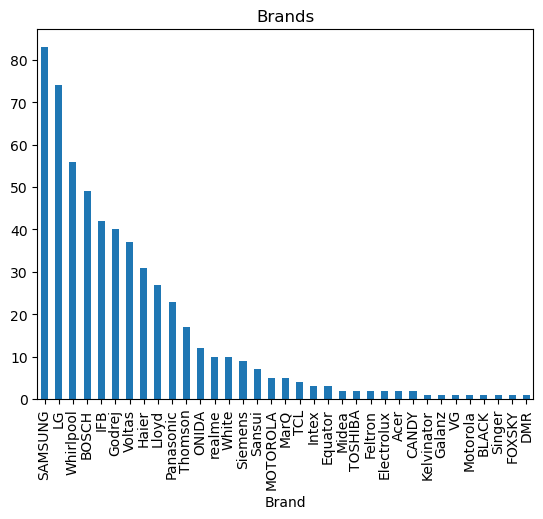

In [79]:
import matplotlib.pyplot as plt
df['Brand'].value_counts().plot.bar()
plt.title("Brands")

## count plot

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

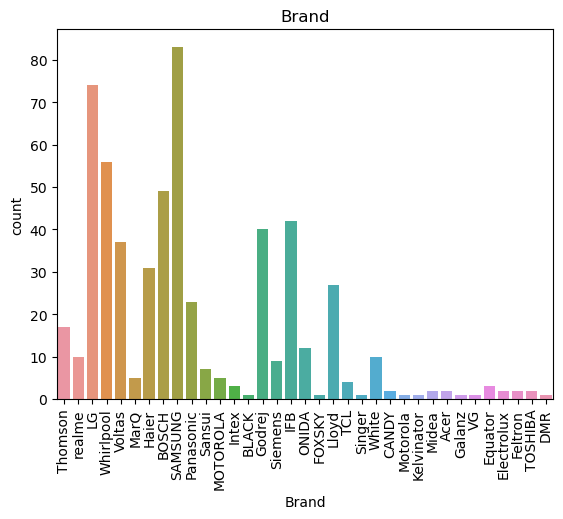

In [81]:
sns.countplot(x = df['Brand'])
plt.title("Brand")
plt.xticks(rotation=90)
plt.show()

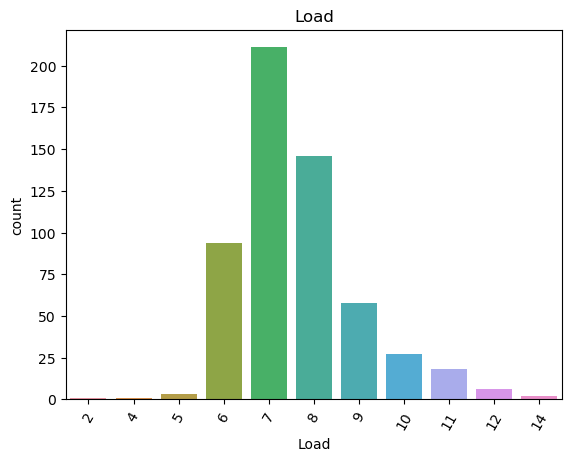

In [82]:
sns.countplot(x = df['Load'])
plt.title("Load")
plt.xticks(rotation=60)
plt.show()

In [83]:
df["Price"].mean()

22378.666666666668

In [84]:
df[df["Price"]>df["Price"].mean()]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
8,LG,7,4.4,17242,28990,Fully,Top,1200,5
10,BOSCH,8,4.4,8795,35900,Fully,Front,1400,5
17,BOSCH,7,4.4,8795,30990,Fully,Front,1000,5
29,LG,9,4.3,408,24990,Fully,Top,700,5
33,SAMSUNG,8,4.4,24506,35990,Fully,Front,1400,5
...,...,...,...,...,...,...,...,...,...
948,SAMSUNG,7,4.6,29,25300,Fully,Top,680,0
949,SAMSUNG,7,0.0,0,31490,Fully,Top,700,0
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5


In [85]:
r=df[df["Rating"]>=4.0]
r

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5
955,LG,7,4.4,809,24990,Fully,Top,700,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


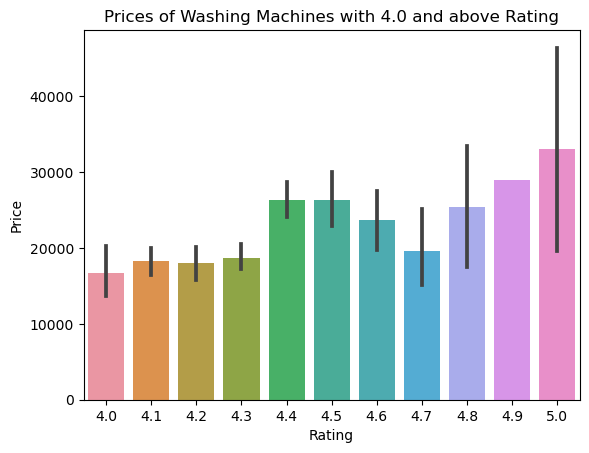

In [86]:
sns.barplot(x='Rating', y='Price', data=r)
plt.title("Prices of Washing Machines with 4.0 and above Rating")
plt.show()

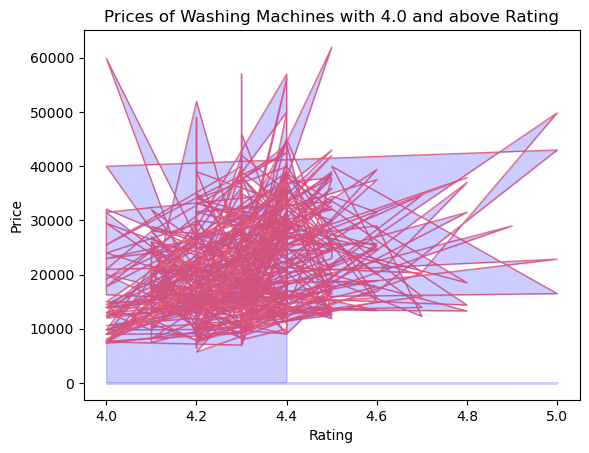

In [87]:
plt.fill_between(r['Rating'], r['Price'], color='blue', alpha=0.2)
plt.plot(r['Rating'], r['Price'], color='red', alpha=0.5, linewidth=0.9)
 
plt.title("Prices of Washing Machines with 4.0 and above Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

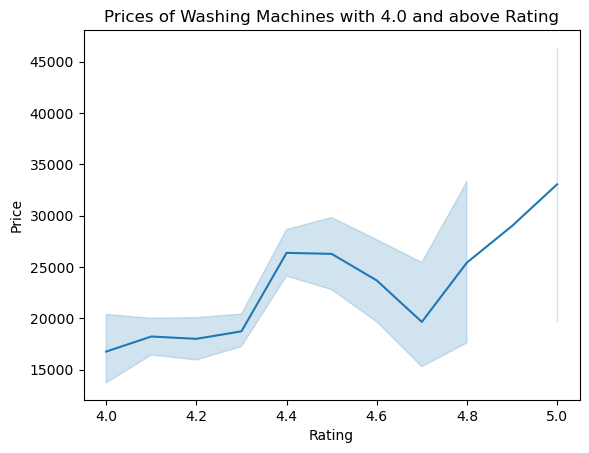

In [88]:
sns.lineplot(x = "Rating", y = "Price", data = r)
plt.title("Prices of Washing Machines with 4.0 and above Rating")
plt.ylabel("Price")
plt.xlabel("Rating")
#plt.xticks(rotation=90)
plt.show()

In [89]:
fa=df[df["Automated_Type"]=="Fully"]
fa

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
1,realme,7,4.1,19495,11790,Fully,Top,700,5
8,LG,7,4.4,17242,28990,Fully,Top,1200,5
10,BOSCH,8,4.4,8795,35900,Fully,Front,1400,5
12,SAMSUNG,7,4.3,14870,15690,Fully,Top,680,3
14,SAMSUNG,8,4.3,52837,18990,Fully,Top,700,5
...,...,...,...,...,...,...,...,...,...
948,SAMSUNG,7,4.6,29,25300,Fully,Top,680,0
949,SAMSUNG,7,0.0,0,31490,Fully,Top,700,0
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5


In [90]:
da=df[df["Automated_Type"]=="Semi"]
da

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
5,Voltas,6,4.3,2902,7990,Semi,Top,1350,5
...,...,...,...,...,...,...,...,...,...
924,Haier,9,4.2,1362,14990,Semi,Top,1300,0
945,Voltas,6,4.3,2015,8390,Semi,Top,1350,0
952,Whirlpool,8,3.8,65,22000,Semi,Top,1400,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


C:\Users\admin\AppData\Local\Temp\ipykernel_8084\3303569417.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes.stem(df['Load'], df['Price'],


Text(0, 0.5, 'Price')

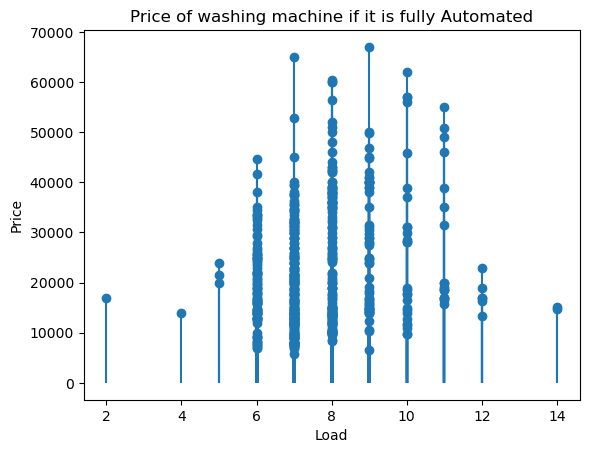

In [91]:
fig, axes = plt.subplots() 
axes.stem(df['Load'], df['Price'], 
          use_line_collection=True, basefmt=' ') 
plt.title('Price of washing machine if it is fully Automated') 
plt.xlabel('Load') 
plt.ylabel('Price') 
#plt.xticks(d['month_number']) 

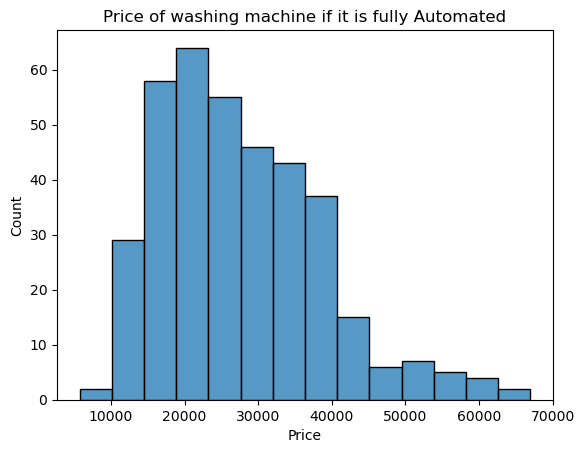

In [92]:
sns.histplot(fa['Price'])
plt.title("Price of washing machine if it is fully Automated")
plt.show()

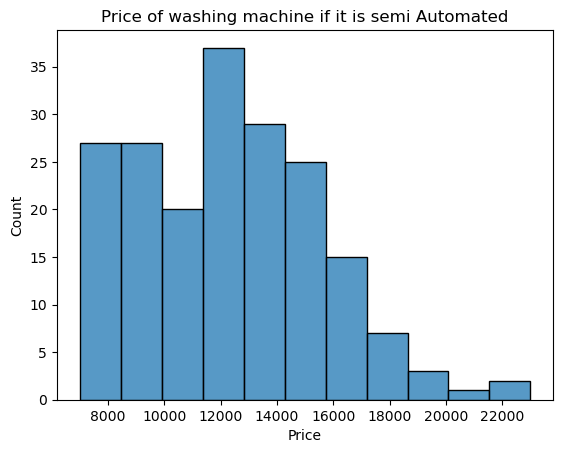

In [93]:
sns.histplot(da['Price'])
plt.title("Price of washing machine if it is semi Automated")
plt.show()

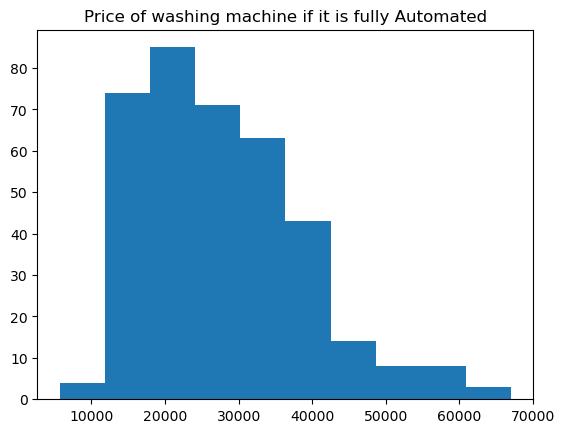

In [94]:
plt.hist(fa['Price'])
plt.title("Price of washing machine if it is fully Automated")
plt.show()

## Piechart

<Axes: title={'center': 'Automation Type'}, ylabel='count'>

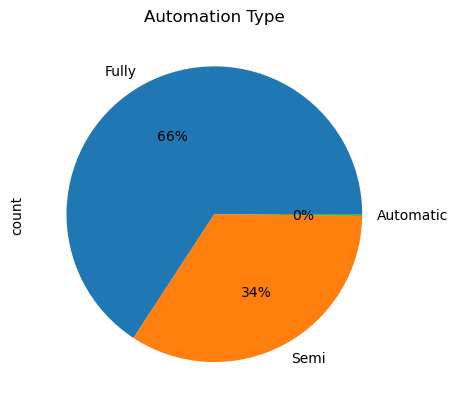

In [95]:
plt.title("Automation Type")
df['Automated_Type'].value_counts().plot.pie(autopct="%.0f%%")

In [96]:
a=pd.DataFrame(df['Load_type'].value_counts())
a

,count
Load_type,
Top,437
Front,130


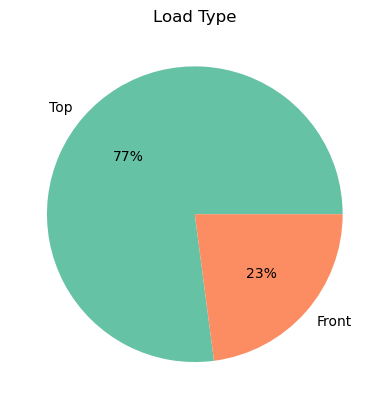

In [97]:
plt.title("Load Type")
colors=sns.color_palette("Set2")
plt.pie(df['Load_type'].value_counts(),labels=a.index,colors=colors,autopct="%.0f%%")
plt.show()

In [98]:
tl=df[df["Load_type"]=="Top"]
tl

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
949,SAMSUNG,7,0.0,0,31490,Fully,Top,700,0
952,Whirlpool,8,3.8,65,22000,Semi,Top,1400,5
955,LG,7,4.4,809,24990,Fully,Top,700,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


C:\Users\admin\AppData\Local\Temp\ipykernel_8084\2860899563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tl['Price'])


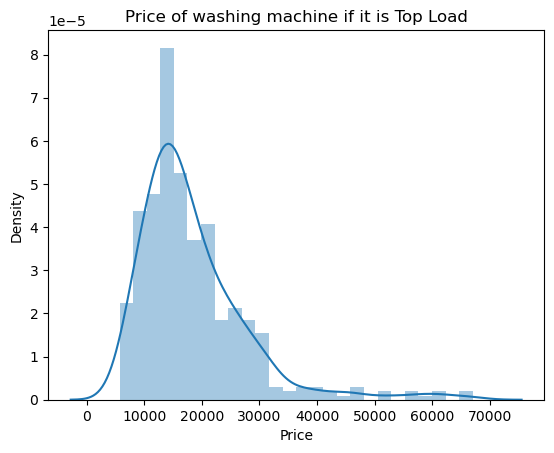

In [99]:
sns.distplot(tl['Price'])
plt.title("Price of washing machine if it is Top Load")
plt.show()

In [100]:
fl=df[df["Load_type"]=="Front"]
fl

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
10,BOSCH,8,4.4,8795,35900,Fully,Front,1400,5
17,BOSCH,7,4.4,8795,30990,Fully,Front,1000,5
33,SAMSUNG,8,4.4,24506,35990,Fully,Front,1400,5
48,SAMSUNG,9,4.4,24506,38990,Fully,Front,1400,5
64,BOSCH,8,4.4,8795,34900,Fully,Front,1400,5
...,...,...,...,...,...,...,...,...,...
934,LG,6,4.4,4631,33680,Fully,Front,1000,5
935,SAMSUNG,11,0.0,0,54990,Fully,Front,1400,5
942,TOSHIBA,7,3.8,0,29900,Fully,Front,1200,0
953,Haier,7,4.2,25,33994,Fully,Front,1200,5


C:\Users\admin\AppData\Local\Temp\ipykernel_8084\4085697982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fl['Price'])


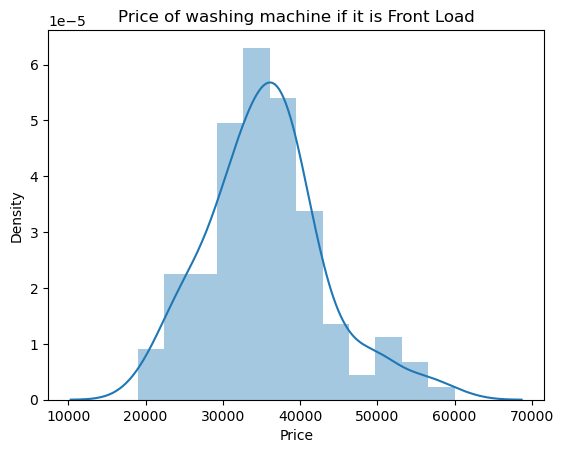

In [101]:
sns.distplot(fl['Price'])
plt.title("Price of washing machine if it is Front Load")
plt.show()

In [102]:
df.describe()

,Load,Rating,Users,Price,Speed,Star_ratings
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,7.619048,3.646914,5177.123457,22378.666667,1056.271605,4.045855
std,1.381167,1.504183,12394.530182,11644.302026,339.275663,1.951174
min,2.000000,0.000000,0.000000,5730.000000,0.000000,0.000000
25%,7.000000,4.000000,12.500000,13524.500000,720.000000,5.000000
50%,7.000000,4.300000,165.000000,18990.000000,1200.000000,5.000000
75%,8.000000,4.400000,2902.000000,29990.000000,1350.000000,5.000000
max,14.000000,5.000000,75515.000000,66990.000000,1600.000000,5.000000


### GROUPBY()

In [145]:
xz=df.groupby(by="Brand")["Price"].agg(['mean'])
xz

,mean
Brand,
Acer,15499.000000
BLACK,18990.000000
BOSCH,33988.204082
CANDY,11190.000000
DMR,13990.000000
Electrolux,41490.000000
Equator,28590.333333
FOXSKY,6990.000000
Feltron,12490.000000


In [104]:
df.groupby(by="Brand")["Price"].agg(['min','max',"mean"])

,min,max,mean
Brand,,,
Acer,13999,16999,15499.000000
BLACK,18990,18990,18990.000000
BOSCH,12490,56990,33988.204082
CANDY,8890,13490,11190.000000
DMR,13990,13990,13990.000000
Electrolux,34990,47990,41490.000000
Equator,16990,46791,28590.333333
FOXSKY,6990,6990,6990.000000
Feltron,11990,12990,12490.000000


In [105]:
df[(df['Price']>10000) & (df['Price']<20000) & (df['Brand']=='SAMSUNG')]

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
12,SAMSUNG,7,4.3,14870,15690,Fully,Top,680,3
14,SAMSUNG,8,4.3,52837,18990,Fully,Top,700,5
39,SAMSUNG,9,4.4,39478,16090,Semi,Top,1300,5
171,SAMSUNG,9,4.4,507,15590,Semi,Top,1300,0
187,SAMSUNG,7,4.4,946,11999,Semi,Top,1300,5
188,SAMSUNG,8,4.4,4231,13990,Semi,Top,1300,5
195,SAMSUNG,8,4.2,78,14250,Semi,Top,1300,5
209,SAMSUNG,8,4.2,78,14699,Semi,Top,1300,5
213,SAMSUNG,7,4.4,103,13000,Semi,Top,1300,5
223,SAMSUNG,11,4.4,317,18819,Semi,Top,1300,5


In [106]:
df

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5
955,LG,7,4.4,809,24990,Fully,Top,700,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


In [ ]:
#df.to_csv("df(wm).csv")

## Heatmap

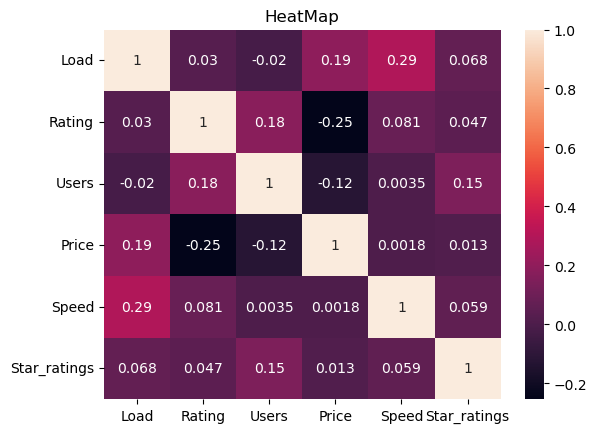

In [128]:
sns.heatmap(df[['Load','Rating','Users','Price','Speed','Star_ratings']].corr(), annot=True)
plt.title("HeatMap")
plt.show()

## Line Graph 

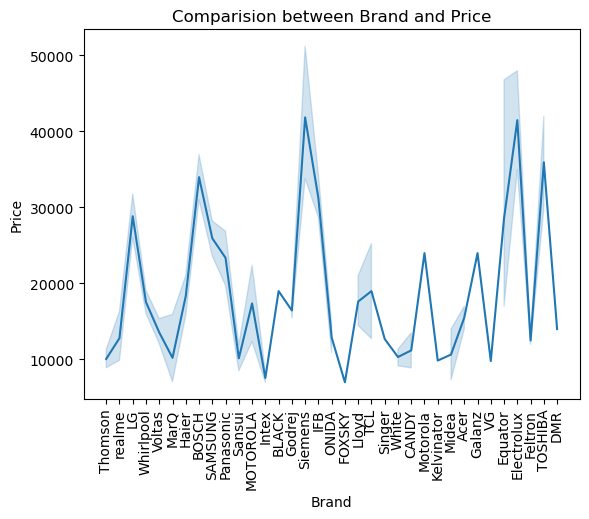

In [142]:
sns.lineplot(x = "Brand", y = "Price", data = df)
plt.title("Comparision between Brand and Price")
plt.ylabel("Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.show()

## Boxplot

<Axes: title={'center': 'Ratings with respect to Load'}, xlabel='Load', ylabel='Rating'>

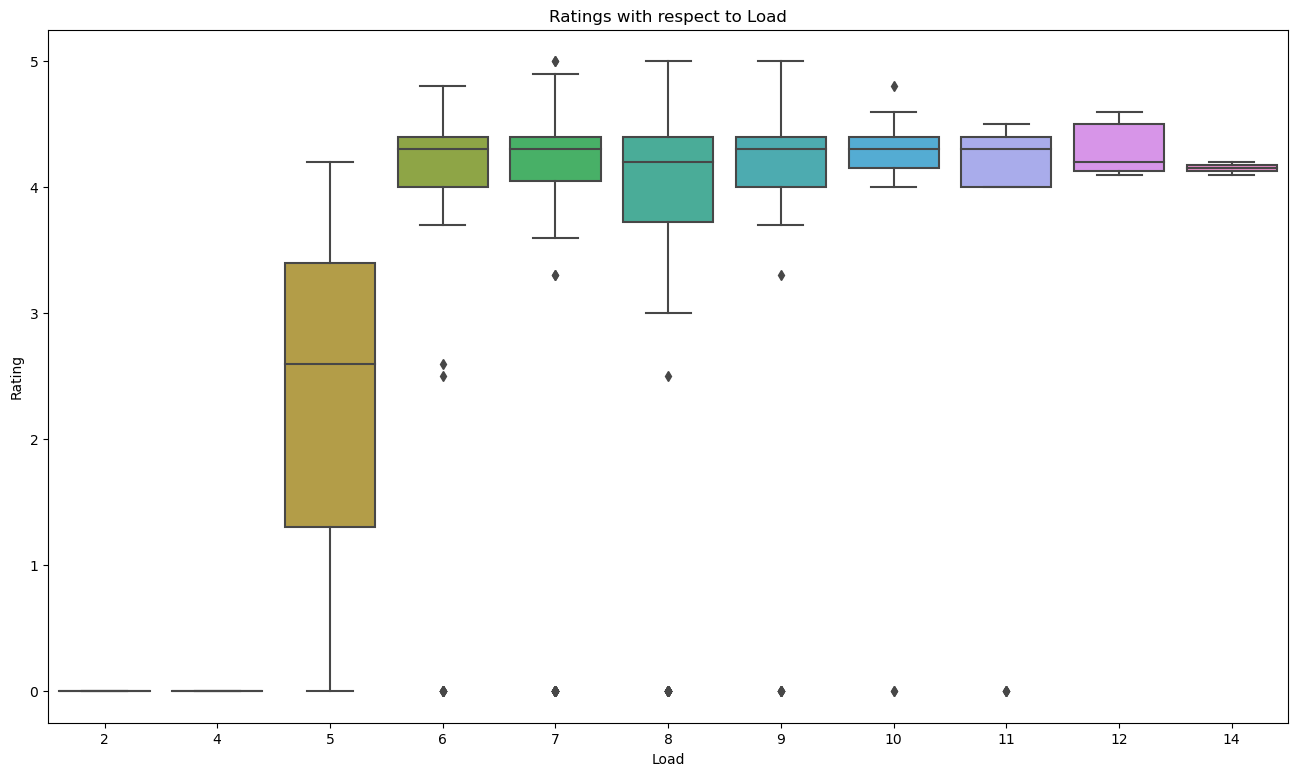

In [129]:
plt.figure(figsize=(16,9))
plt.title("Ratings with respect to Load")
sns.boxplot(x="Load",y="Rating",data=df)

<Axes: title={'center': 'Prices according to Load'}, xlabel='Load', ylabel='Price'>

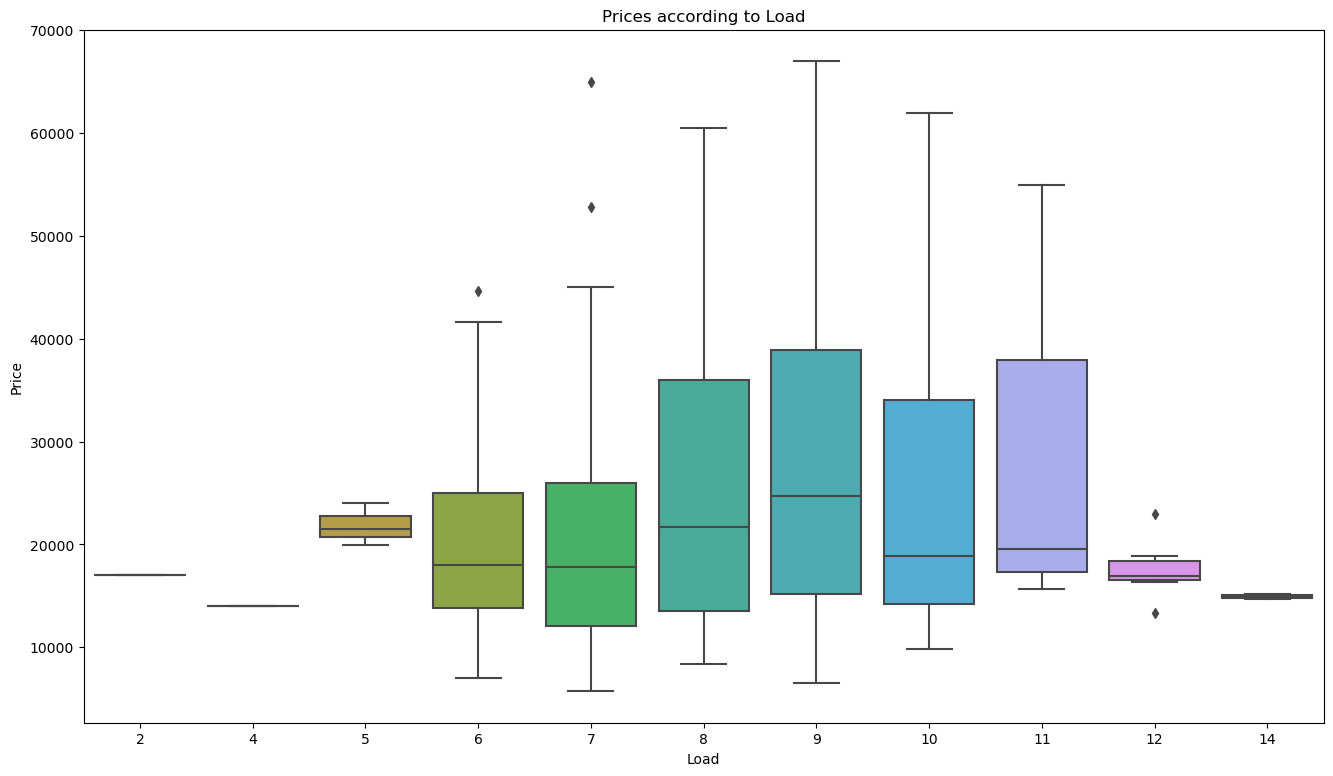

In [130]:
plt.figure(figsize=(16,9))
plt.title("Prices according to Load")
sns.boxplot(x="Load",y="Price",data=df)

<Axes: title={'center': 'Ratings with respect to Load'}, xlabel='Load', ylabel='Rating'>

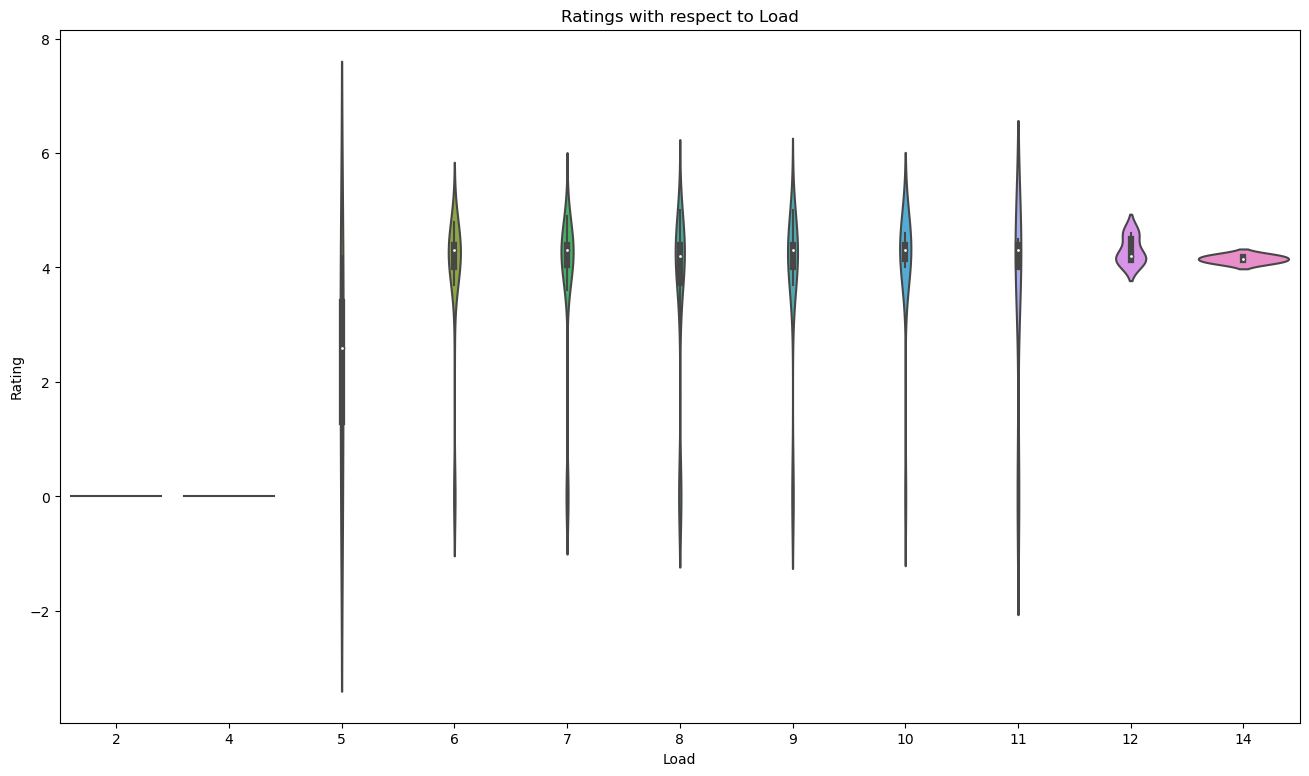

In [131]:
plt.figure(figsize=(16,9))
plt.title("Ratings with respect to Load")
sns.violinplot(x="Load",y="Rating",data=df)

## Histogram

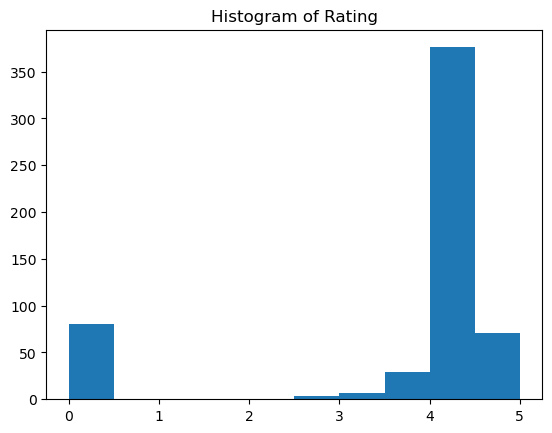

In [112]:
plt.hist(df['Rating'])
plt.title("Histogram of Rating")
plt.show()

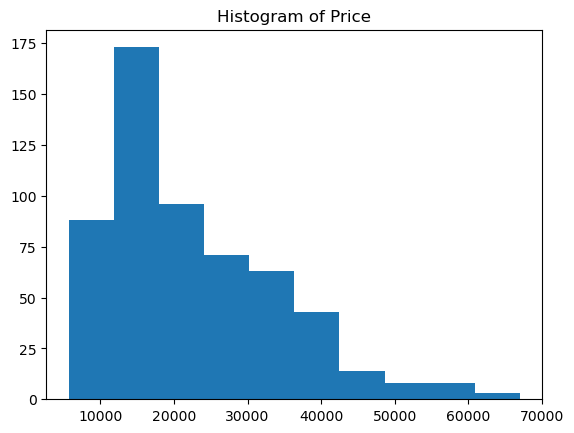

In [113]:
plt.hist(df['Price'])
plt.title("Histogram of Price")
plt.show()

In [114]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Speed', ylabel='Density'>

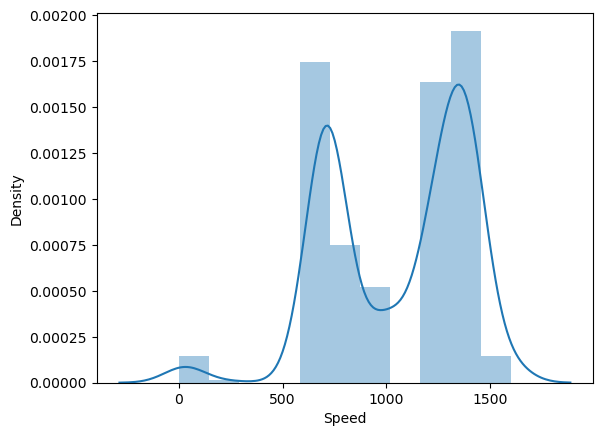

In [115]:
sns.distplot(df['Speed'])

Text(0.5, 1.0, 'Density plot of Price')

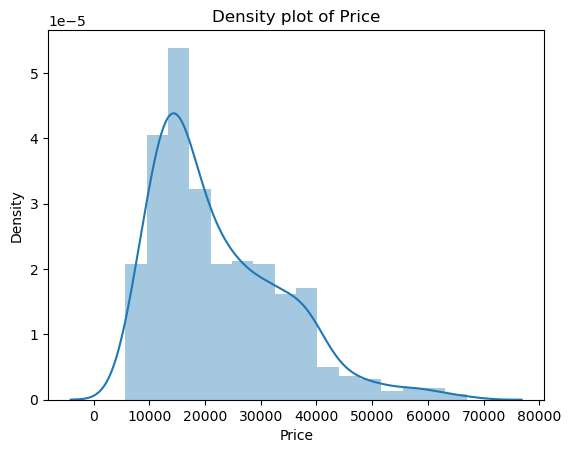

In [132]:
sns.distplot(df['Price'])
plt.title("Density plot of Price")

Text(0.5, 0, 'Load')

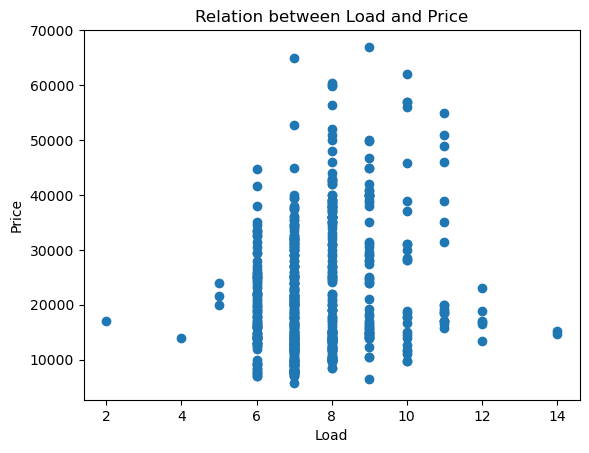

In [117]:
plt.scatter(df['Load'],df['Price'])
plt.title("Relation between Load and Price")
plt.ylabel("Price")
plt.xlabel("Load")

## Bargraph 

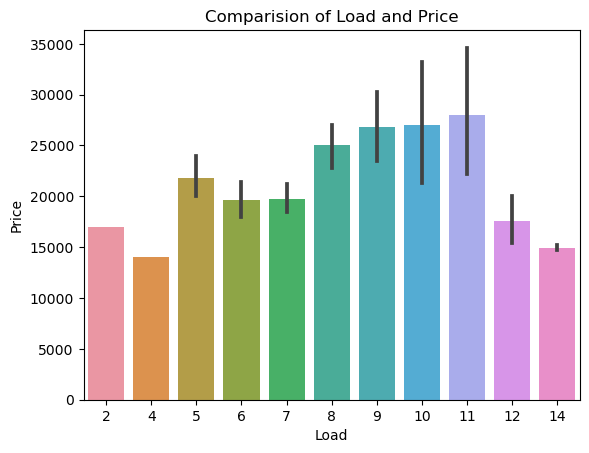

In [133]:
sns.barplot(x='Load', y='Price', data=df)
plt.title("Comparision of Load and Price")
plt.show()

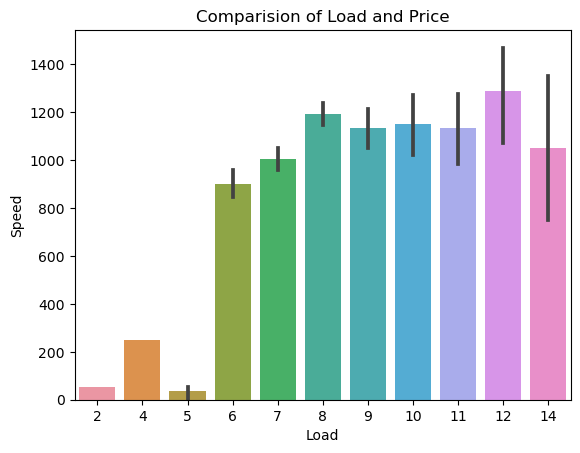

<Figure size 1600x900 with 0 Axes>

In [153]:
sns.barplot(x='Load', y='Speed', data=df)
plt.title("Comparision of Load and Price")
plt.figure(figsize=(16,9))
plt.show()

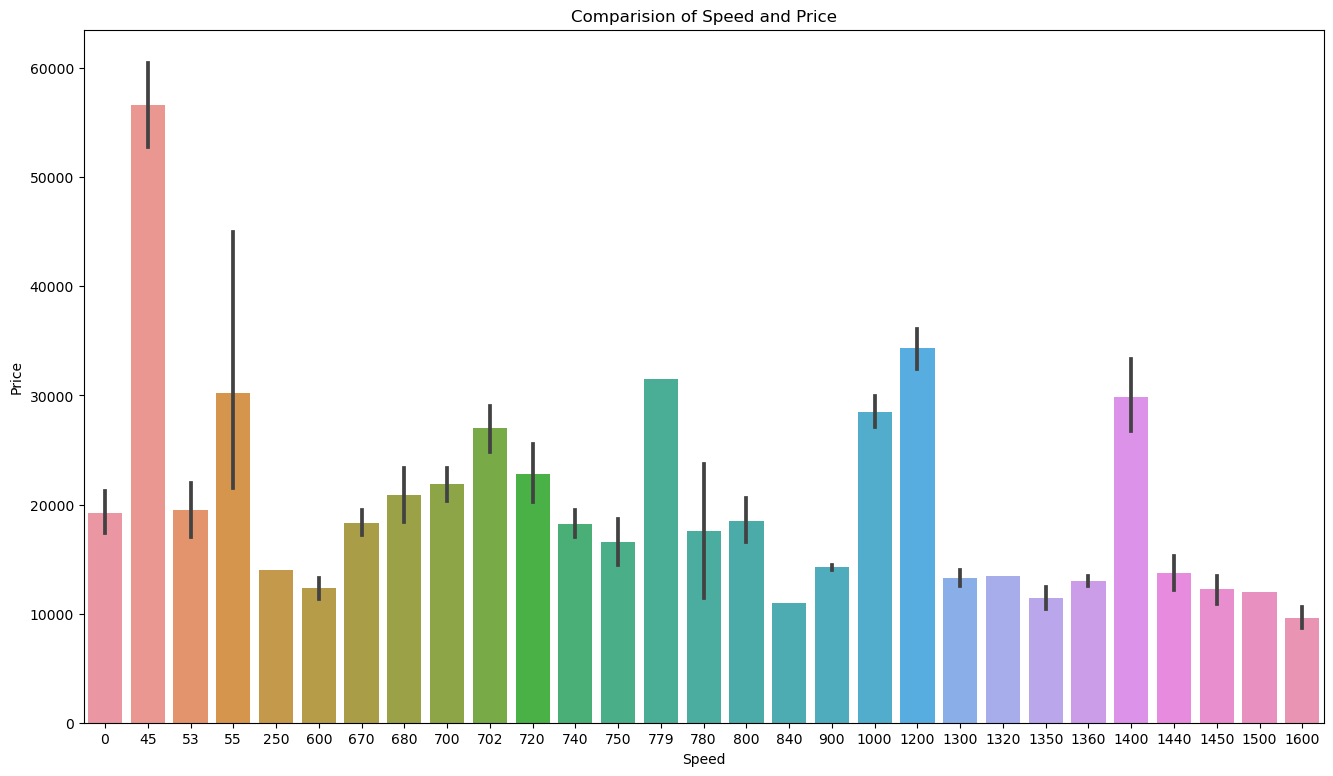

In [155]:
plt.figure(figsize=(16,9))
sns.barplot(x='Speed', y='Price', data=df)
plt.title("Comparision of Speed and Price")
plt.show()

In [120]:
df["Price"].max() 

66990

In [121]:
df["Brand"].max() 

'realme'

In [122]:
df[df['Brand']=='SAMSUNG']['Price'].mean()

25940.590361445782

In [123]:
da=df[df["Load"]==7]
da

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
949,SAMSUNG,7,0.0,0,31490,Fully,Top,700,0
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
955,LG,7,4.4,809,24990,Fully,Top,700,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


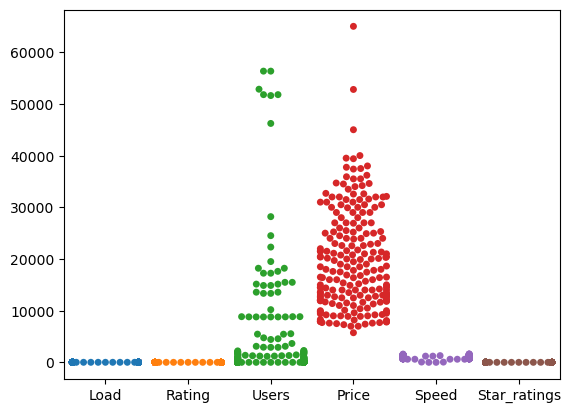

In [127]:
sns.swarmplot(da)

plt.show()

## Connected Scatterplot

Text(0.5, 0, 'Price')

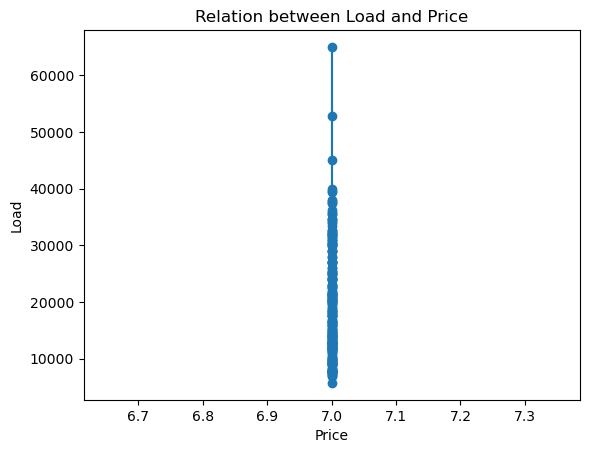

In [125]:
plt.scatter(da['Load'],da['Price'])
plt.plot(da['Load'],da['Price'])
plt.title("Relation between Load and Price")
plt.ylabel("Load")
plt.xlabel("Price")

In [150]:
x=pd.crosstab(df["Brand"],df["Load"])
x

Load,2,4,5,6,7,8,9,10,11,12,14
Brand,,,,,,,,,,,
Acer,0,0,0,0,1,1,0,0,0,0,0
BLACK,0,0,0,1,0,0,0,0,0,0,0
BOSCH,0,0,0,7,22,11,6,3,0,0,0
CANDY,0,0,0,0,2,0,0,0,0,0,0
DMR,0,1,0,0,0,0,0,0,0,0,0
Electrolux,0,0,0,0,0,1,1,0,0,0,0
Equator,1,0,0,1,0,0,1,0,0,0,0
FOXSKY,0,0,0,0,1,0,0,0,0,0,0
Feltron,0,0,0,0,1,1,0,0,0,0,0


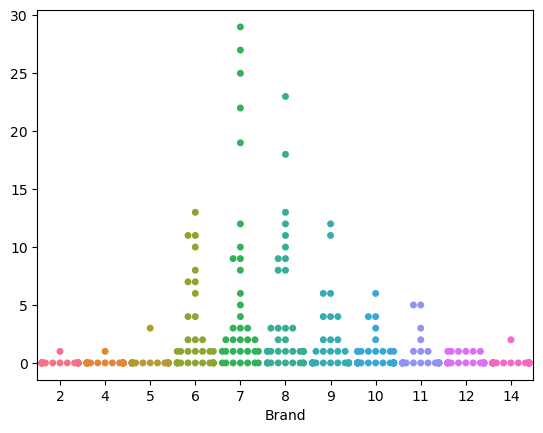

In [139]:
sns.swarmplot(x)
plt.xlabel("Brand")

plt.show()

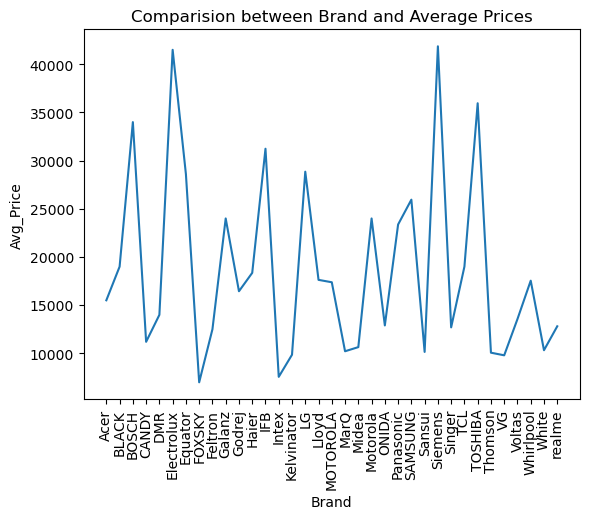

In [147]:
sns.lineplot(x = "Brand", y = "mean", data = xz)
plt.title("Comparision between Brand and Average Prices")
plt.ylabel("Avg_Price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, axes = plt.subplots() 
axes.stem(x['Load'], ['Price'], 
          use_line_collection=True, basefmt=' ') 
plt.title('Price of washing machine if it is fully Automated') 
plt.xlabel('Load') 
plt.ylabel('Price') 
#plt.xticks(d['month_number']) 

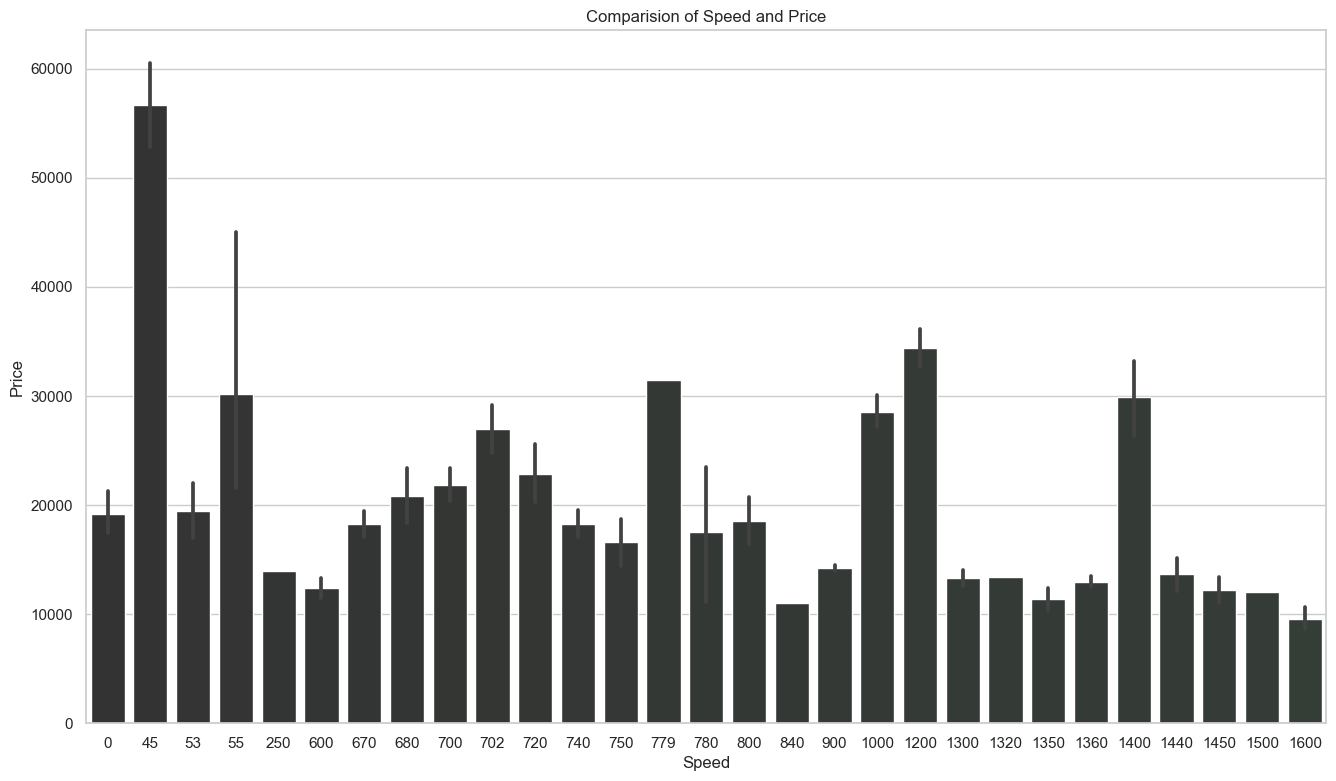

In [158]:
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(df))
plt.figure(figsize=(16,9))
sns.barplot(x='Speed', y='Price', data=df,palette=np.array(pal[::-1]))
plt.title("Comparision of Speed and Price")
plt.show()


In [159]:
df

,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
953,Haier,7,4.2,25,33994,Fully,Front,1200,5
954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5
955,LG,7,4.4,809,24990,Fully,Top,700,5
958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


In [160]:
#df.to_csv("df(wm).csv")

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\admin\Downloads\df(wm).csv")

In [3]:
df


,Unnamed: 0,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...,...
562,953,Haier,7,4.2,25,33994,Fully,Front,1200,5
563,954,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5
564,955,LG,7,4.4,809,24990,Fully,Top,700,5
565,958,Lloyd,7,4.3,28,11369,Semi,Top,600,0


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df


,Brand,Load,Rating,Users,Price,Automated_Type,Load_type,Speed,Star_ratings
0,Thomson,7,4.0,8834,7690,Semi,Top,1600,5
1,realme,7,4.1,19495,11790,Fully,Top,700,5
2,realme,7,4.2,51785,7890,Semi,Top,1400,5
3,LG,7,4.4,28184,11490,Semi,Top,1350,5
4,Whirlpool,7,4.4,13340,9990,Semi,Top,1400,5
...,...,...,...,...,...,...,...,...,...
562,Haier,7,4.2,25,33994,Fully,Front,1200,5
563,BOSCH,9,4.4,8786,39890,Fully,Front,1200,5
564,LG,7,4.4,809,24990,Fully,Top,700,5
565,Lloyd,7,4.3,28,11369,Semi,Top,600,0


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


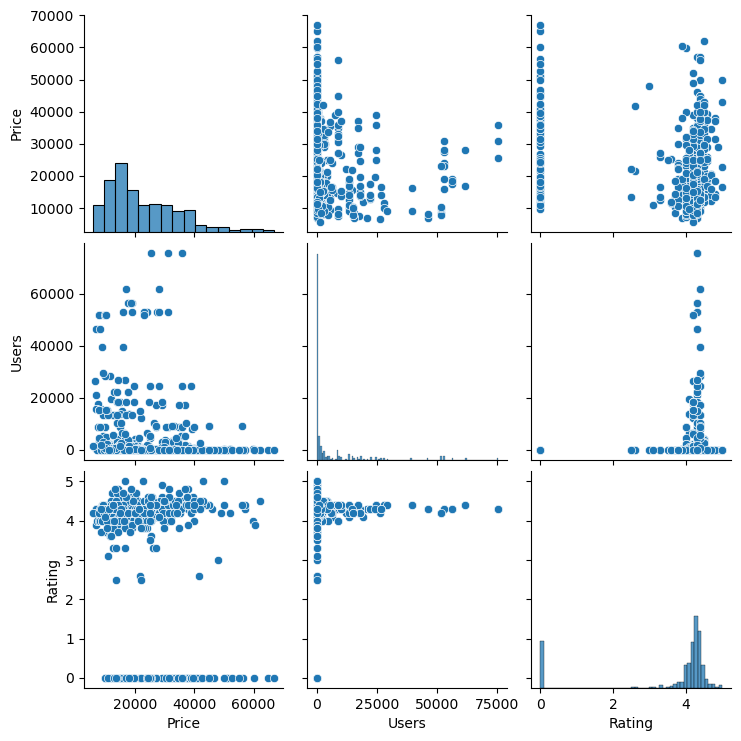

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = df, vars=['Price','Users','Rating'])
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


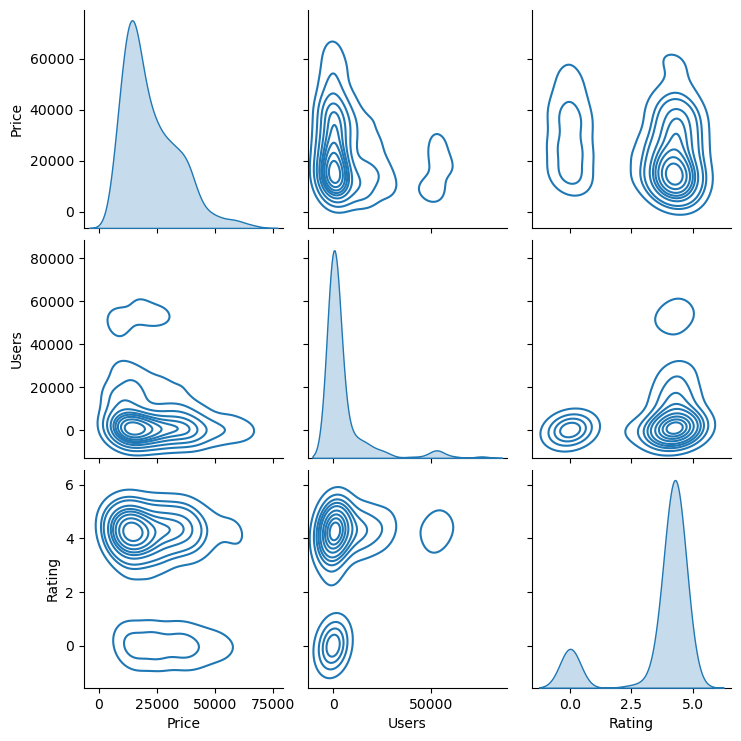

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = df, vars=['Price','Users','Rating'],kind="kde")
plt.show()